# Import Libraries

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox, shapiro, kstest

In [4]:
dataframe = pd.read_csv('./assets/insurance.csv')
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(" ROWS & COLUMNS ".center(70,'-'))
print("Number of rows: {}".format(dataframe.shape[0]))
print("Column Names: "+', '.join('{}'.format(col) for col in dataframe.columns.tolist()))
print(" COLUMN TYPES ".center(70,'-'))
print(dataframe.dtypes)
print(" NULLS ".center(70,'-'))
print(dataframe.isnull().sum())
print(" DUPLICATES ".center(70,'-'))
print(dataframe.duplicated().sum())

--------------------------- ROWS & COLUMNS ---------------------------
Number of rows: 1338
Column Names: age, sex, bmi, children, smoker, region, charges
---------------------------- COLUMN TYPES ----------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
------------------------------- NULLS --------------------------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
----------------------------- DUPLICATES -----------------------------
1


<Figure size 1200x400 with 0 Axes>

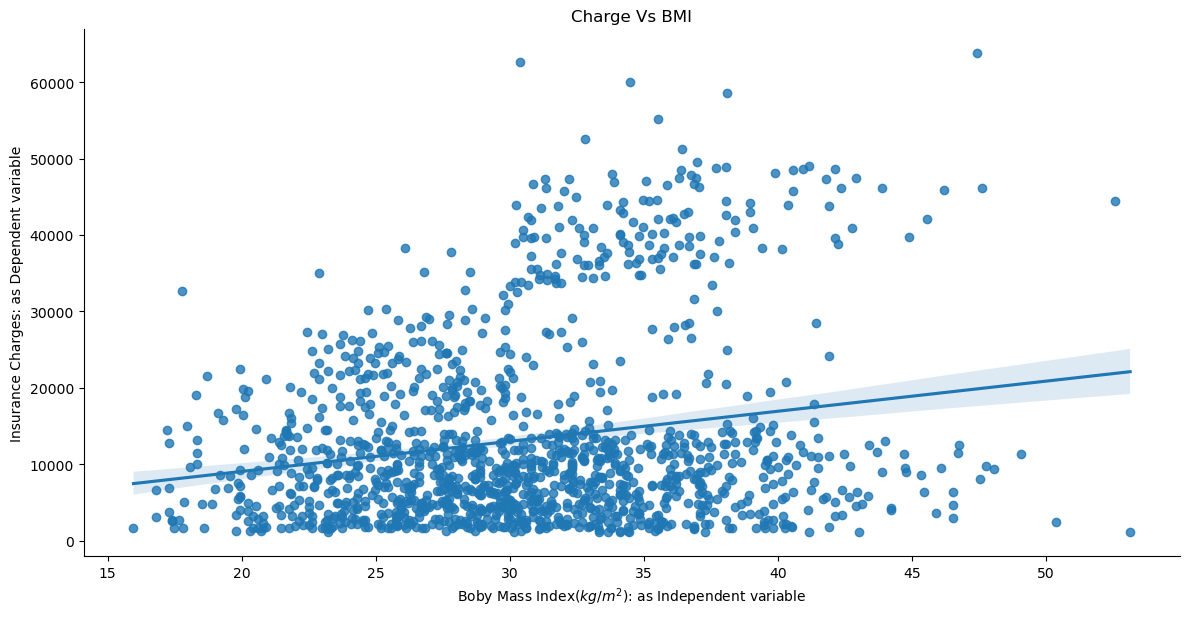

In [10]:
f = plt.figure(figsize=(12,4))

sns.lmplot(x='bmi', y='charges', data=dataframe, aspect=2, height=6)

plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [11]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


OBS: Charges is the only variable where mean != median

In [13]:
dataframe[dataframe.isnull()].dropna().count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

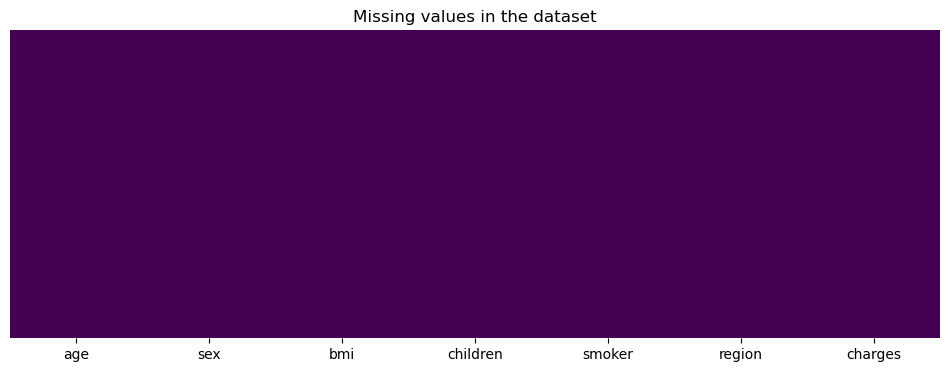

In [14]:
plt.figure(figsize=(12,4))
sns.heatmap(dataframe.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset');

## Correlation plot

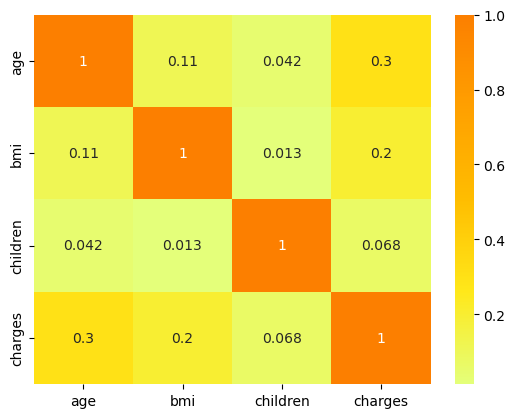

In [16]:
corr = dataframe.corr(numeric_only=True)
sns.heatmap(corr, cmap = 'Wistia', annot= True);

OBS: No strong correlation between variables

In [19]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


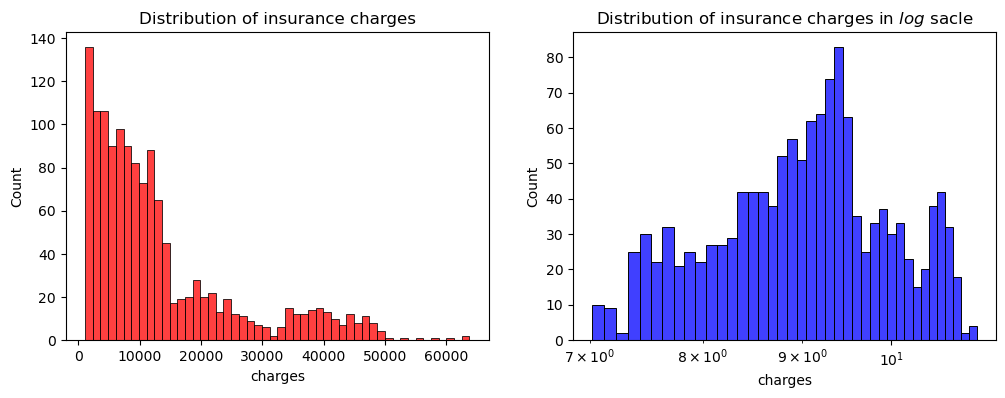

In [84]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(dataframe['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log(dataframe['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

In [87]:
from distfit import distfit

print(shapiro(np.log(dataframe["charges"])))
print(kstest(np.log(dataframe["charges"]), 'norm'))
dfit2 = distfit(n_boots=100, distr='norm')
dfit2.fit_transform(np.log(dataframe["charges"]))
dfit2.summary

[distfit] >INFO> fit
[distfit] >INFO> transform


ShapiroResult(statistic=0.9831625819206238, pvalue=2.286311071020286e-11)
KstestResult(statistic=0.9999999999989123, pvalue=0.0, statistic_location=7.02275569117477, statistic_sign=-1)


[distfit] >INFO> [norm] [0.10 sec] [RSS: 0.107] [loc=9.099 scale=0.919]
[distfit] >INFO> Compute confidence intervals [parametric]


,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,norm,0.107,9.098659,0.919183,(),"(9.098658729424766, 0.9191834287056958)",<scipy.stats._distn_infrastructure.rv_continuo...,0.0,False,#e41a1c


In [83]:
from distfit import distfit

print(shapiro(dataframe["bmi"]))
print(kstest(dataframe["bmi"], 'norm'))
dfit2 = distfit(n_boots=100, distr='norm')
dfit2.fit_transform(dataframe["bmi"])
dfit2.summary

[distfit] >INFO> fit
[distfit] >INFO> transform


ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=15.96, statistic_sign=-1)


[distfit] >INFO> [norm] [0.07 sec] [RSS: 0.000219113] [loc=30.663 scale=6.096]
[distfit] >INFO> Compute confidence intervals [parametric]


,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,norm,0.000219,30.663397,6.095908,(),"(30.66339686098655, 6.0959076415894256)",<scipy.stats._distn_infrastructure.rv_continuo...,0.03,False,#e41a1c
